### Análise dos dados

### Descrição de cada coluna
- product_category_name = categoria do produto
- product_category_name_english = categoria do produto em inglês 
- customer_id = id do consumidor
- customer_unique_id = id unico do consumidor
- customer_zip_code_prefix = codigo zip do consumidor
- customer_city = cidade do consumidor
- customer_state = estado do consumidor
- order_id = código id do pedido
- order_item_id = código id do item
- product_id = código id do produto
- seller_id = código id do vendedor
- shipping_limit_date = data limite de envio
- price = preço
- freight_value = preço do frete
- payment_sequential = quantidade de pagamentos
- payment_type = tipo de pagamento
- payment_installments = quantidade de parcelas do pagamento
- payment_value = valor do pagamento
- review_id = código id da review
- review_score = avaliação da review
- review_comment_title = titulo da review
- review_comment_message = comentario da review
- review_creation_date = criação da review
- review_answer_timestamp = resposta da review
- order_status = estado da ordem
- order_purchase_timestamp = data e hora em que o pedido foi feito
- order_approved_at = data e hora em que o pedido foi aprovado
- order_delivered_carrier_date = data em que o pedido foi entregue à transportadora
- order_delivered_customer_date = data em que o pedido foi entregue ao cliente
- delivery_time = tempo total de entrega, calculado desde o momento em que o pedido foi feito até o momento em que foi entregue ao cliente
- delivery_time_model = tempo total estimado pela empresa para fazer a entrega
- product_name_lenght = comprimento do nome do produto
- product_description_lenght = comprimento da descrição do produto
- product_photos_qty = quantidade de imagens do produto
- product_weight_g = peso do produto
- product_length_cm = comprimento do produto
- product_height_cm = altura do produto
- product_width_cm = largura do produto
- seller_zip_code_prefix = código zip do vendedor
- seller_city = cidade do vendedor
- seller_state = estado do vendedor

OBS: Existiam no começo 7 colunas reptidas.

### Anotações diogo
- Criar coluna distância
- Criar colunas de dados das cidades
- Colcar cidade e estado onde ta vazio*
- Colunas categoricas: Plotar grafico de barras, ...
    binario
- Relações relevantes: Médias por cidade, 
- Tipo de grafico que mais gostam dispersão, colunas, pizzar e 
- Fluxo e grafos nadave

### Dados relevantes
- Preço do frete
- Tempo estimado
- Tempo real
- Distancia*
- Cidade do comprador e cidade do vendedor
- População/tamanho da cidade*
- Tipo de pagamento
- Categoria do produto
- Tamanho 
- Peso
- Avaliação

### Relações que possam fazer sentido
- Tempo estima x tempo real - 
- Distancia x tempo real - 
- Tipo de pagamento x tempo real - 
- Cidade do comprador x tempo real - 
- Cidade do vendedor x tempo real - 
- Avaliação x tempo real - 
- Categoria do produto x tempo real - 
- Peso x tempo real - 

- Tamanho x frete - 
- Peso x frete - 
- Categoria do produto x frete - 
- Tipo de pagamento x frete - 
- Categoria do produto x tempo real - 

In [1]:
# Realizando os imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Importando a dataBase e imprimindo
df = pd.read_excel('./baseDeDados/dataBaseTratada.xlsx')
df

product_category_name product_category_name_english  \
0       utilidades_domesticas                    housewares   
1       utilidades_domesticas                    housewares   
2       utilidades_domesticas                    housewares   
3                   papelaria                    stationery   
4                  automotivo                          auto   
...                       ...                           ...   
73384                   bebes                          baby   
73385      eletrodomesticos_2             home_appliances_2   
73386  informatica_acessorios         computers_accessories   
73387  informatica_acessorios         computers_accessories   
73388            beleza_saude                 health_beauty   

                            customer_id                customer_unique_id  \
0      9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
1      9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
2      9ef432eb6251297304e76186b10a928d  7c396fd4830fd04220f754e42b4e5bff   
3      8ab97904e6daea8866dbdbc4fb7aad2c  72632f0f9dd73dfee390c9b22eb56dd6   
4      503740e9ca751ccdda7ba28e9ab8f608  80bb27c7c16e8f973207a5086ab329e2   
...                                 ...                               ...   
73384  1fca14ff2861355f6e5f14306ff977a7  da62f9e57a76d978d02ab5362c509660   
73385  1aa71eb042121263aafbe80c1b562c9c  737520a9aad80b3fbbdad19b66b37b30   
73386  b331b74b18dc79bcdf6532d51e1637c1  5097a5312c8b157bb7be58ae360ef43c   
73387  b331b74b18dc79bcdf6532d51e1637c1  5097a5312c8b157bb7be58ae360ef43c   
73388  edb027a75a1449115f6b43211ae02a24  60350aa974b26ff12caad89e55993bd6   

       customer_zip_code_prefix         customer_city  customer_state  \
0                          3149             sao paulo       sao paulo   
1                          3149             sao paulo       sao paulo   
2                          3149             sao paulo       sao paulo   
3                          9195           santo andre       sao paulo   
4                         86320          congonhinhas          parana   
...                         ...                   ...             ...   
73384                     11722          praia grande       sao paulo   
73385                     45920              alcobaça           bahia   
73386                     28685  cachoeiras de macacu  rio de janeiro   
73387                     28685  cachoeiras de macacu  rio de janeiro   
73388                     83750              contenda          parana   

                               order_id  order_item_id  \
0      e481f51cbdc54678b7cc49136f2d6af7              1   
1      e481f51cbdc54678b7cc49136f2d6af7              1   
2      e481f51cbdc54678b7cc49136f2d6af7              1   
3      ad21c59c0840e6cb83a9ceb5573f8159              1   
4      a4591c265e18cb1dcee52889e2d8acc3              1   
...                                 ...            ...   
73384  63943bddc261676b46f01ca7ac2f7bd8              1   
73385  83c1379a015df1e13d02aae0204711ab              1   
73386  11c177c8e97725db2631073c19f07b62              2   
73387  11c177c8e97725db2631073c19f07b62              1   
73388  66dea50a8b16d9b4dee7af250b4be1a5              1   

                             product_id  ... dia_da_semana_Monday  \
0      87285b34884572647811a353c7ac498a  ...                    1   
1      87285b34884572647811a353c7ac498a  ...                    1   
2      87285b34884572647811a353c7ac498a  ...                    1   
3      65266b2da20d04dbe00c5c2d3bb7859e  ...                    0   
4      060cb19345d90064d1015407193c233d  ...                    0   
...                                 ...  ...                  ...   
73384  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...                    0   
73385  b80910977a37536adeddd63663f916ad  ...                    0   
73386  d1c427060a0f73f6b889a5c7c61f2ac4  ...                    1   
73387  d1c427060a0f73f6b889a5c7c61f2ac4  ...                  

<bound method Axes.plot of <Axes: >>

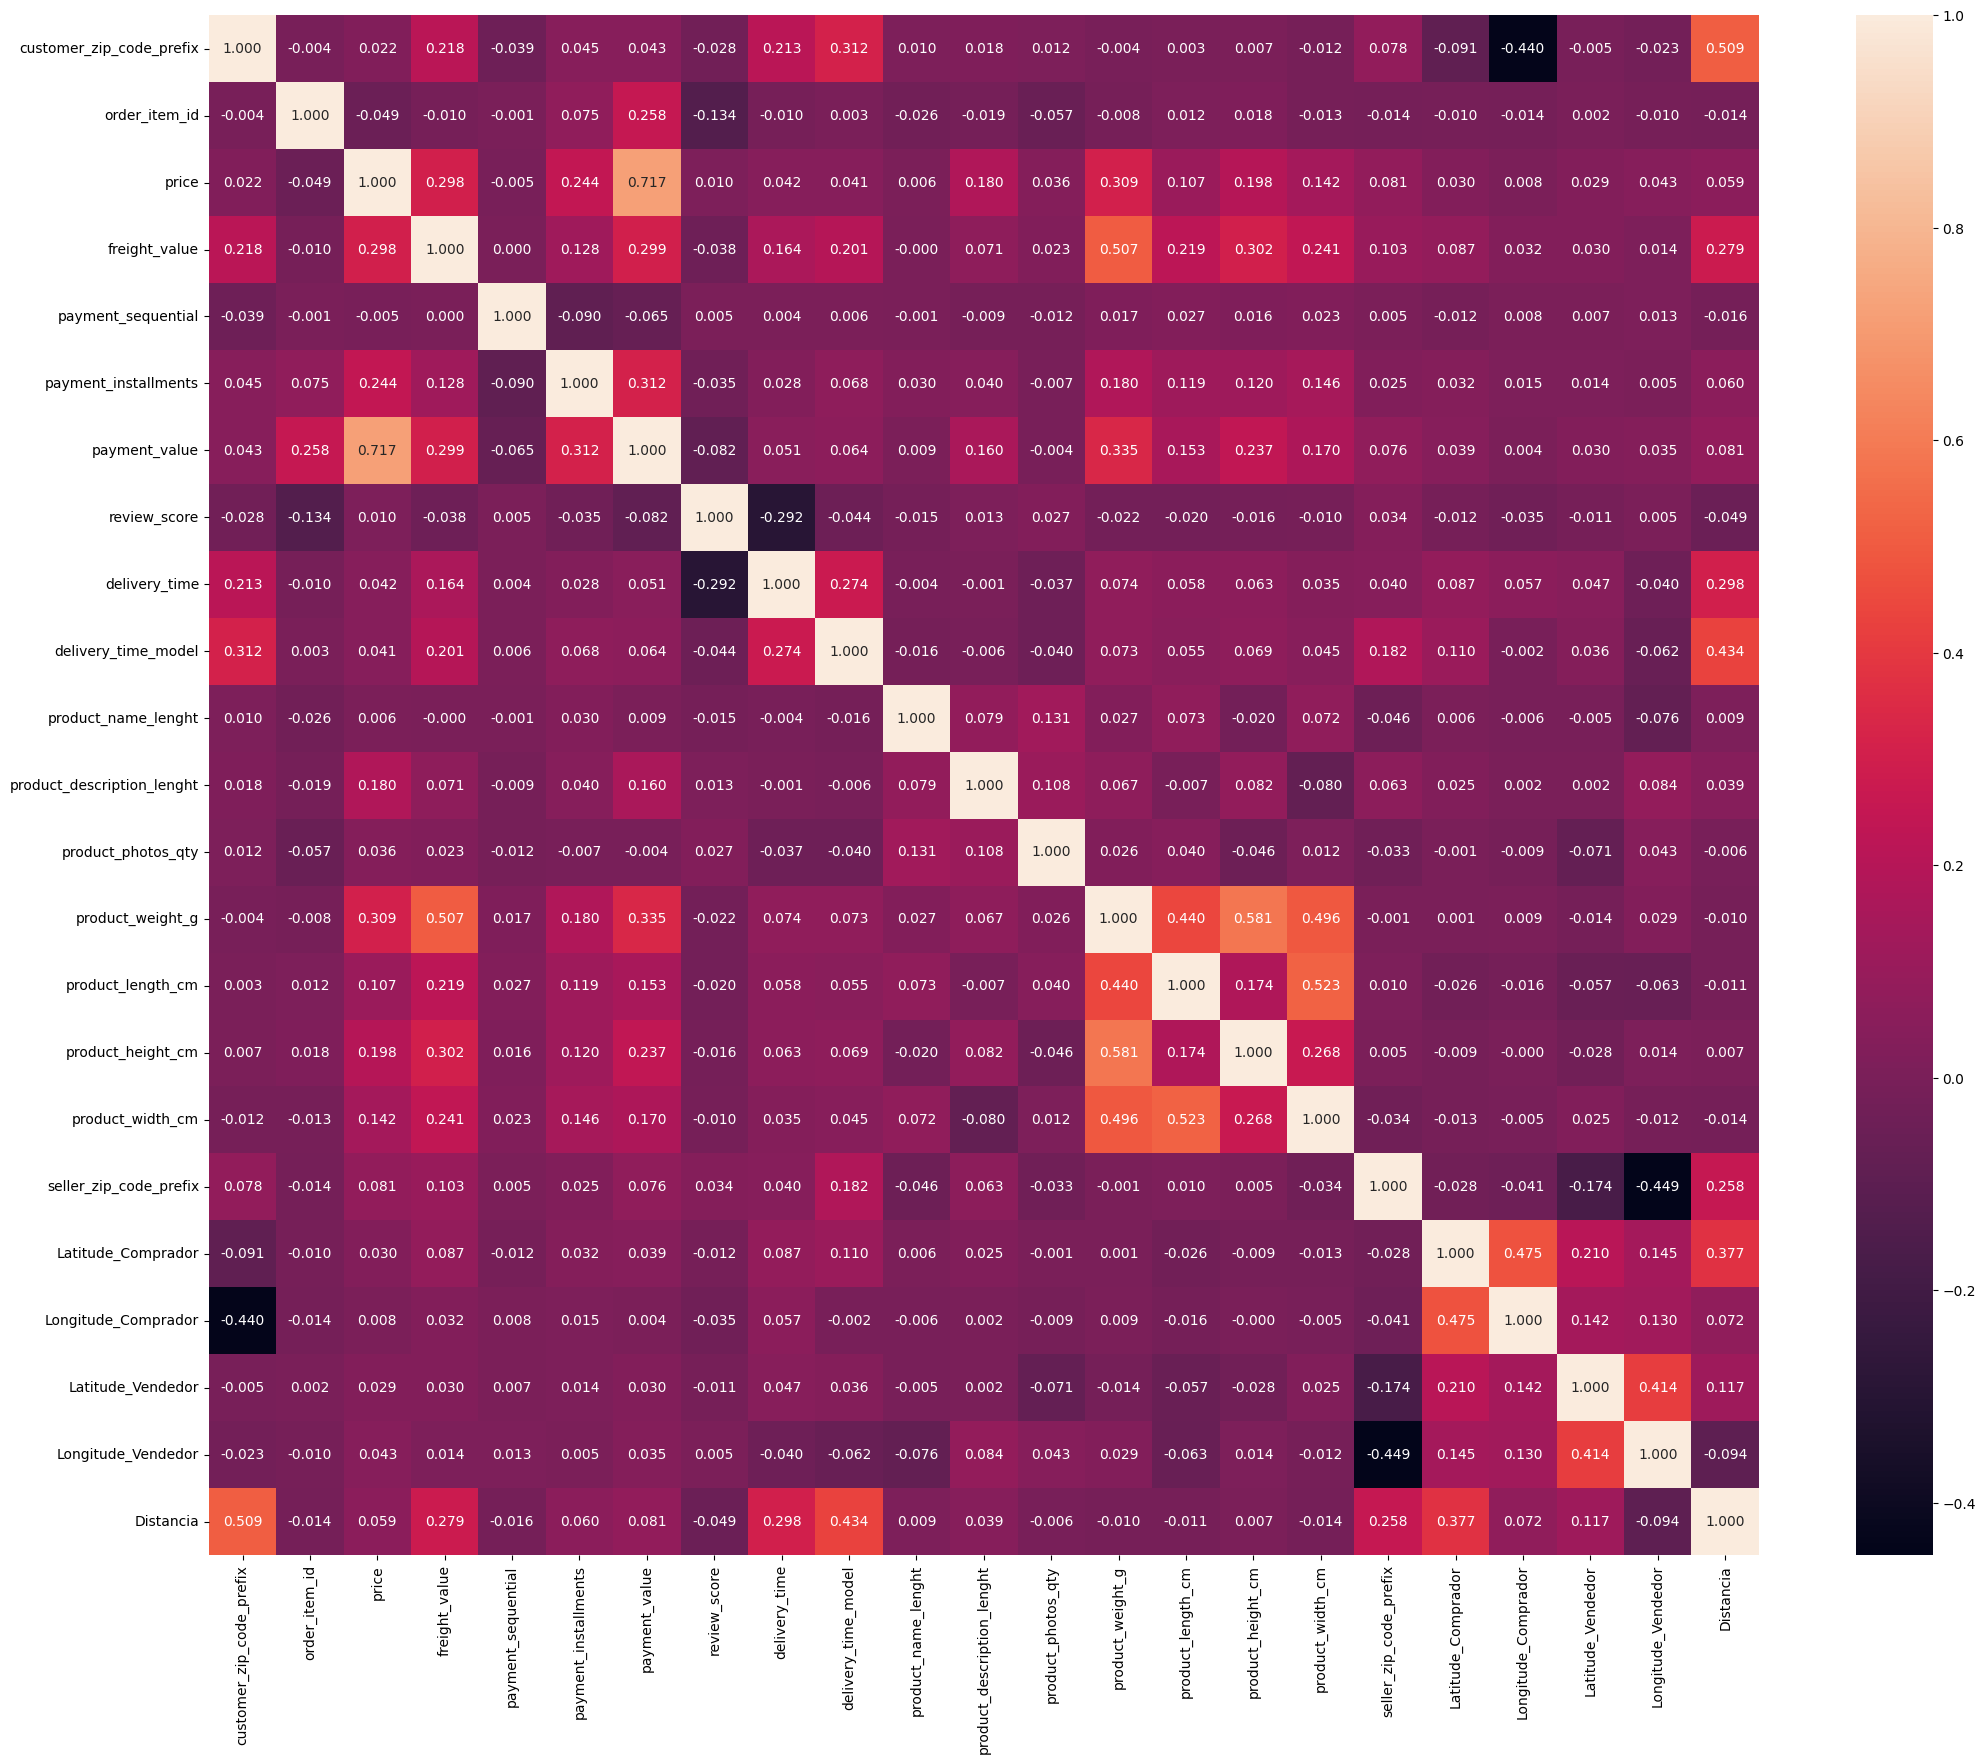

In [3]:
# Dataframe apenas com valores numericos
numericos = {}

for coluna in df.columns:
    if (str(df[coluna].dtypes)) == 'float64' or (str(df[coluna].dtypes)) == 'int64':
        numericos[coluna] = df[coluna]

dfNumerico = pd.DataFrame(data=numericos)

# Removendo alguma colunas
# Encontra a posição da coluna base
coluna_index = dfNumerico.columns.get_loc('dia_da_semana_Friday')

# Mantém as colunas à esquerda e a coluna base
dfNumerico = dfNumerico.iloc[:, :coluna_index]

plt.figure(figsize=(25,20))
figure = sns.heatmap(dfNumerico.corr(), annot=True, fmt=".3f", vmax = 1)
figure.plot

In [4]:
# Calcular a correlação da coluna 'delivery_time' com todas as outras
correlacao_delivery_time = dfNumerico.corr()['delivery_time'].drop('delivery_time')

# Criar um DataFrame a partir da Série de correlação
correlacao_df = correlacao_delivery_time.reset_index()
correlacao_df.columns = ['Colunas', 'Correlação']

# Criar o gráfico de barras interativo usando Plotly
fig = px.bar(correlacao_df, x='Colunas', y='Correlação', title='Correlação de delivery_time com outras colunas',
             labels={'Colunas': 'Colunas', 'Correlação': 'Correlação'},
             color='Correlação', color_continuous_scale=px.colors.sequential.Viridis,
             text='Correlação')

# Atualizar o layout para exibir as etiquetas nas barras
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    width=1000,  
    height=500,  
    xaxis={'tickangle': -90},
)

# Ajustar o eixo y para garantir que haja espaço suficiente para os valores das barras
fig.update_yaxes(range=[correlacao_df['Correlação'].min() - 0.1, correlacao_df['Correlação'].max() + 0.1])

# Exibir o gráfico
fig.show()

Percebemos que o tempo de entrega apresenta uma baixa correlação com informações de id do item pedido, quantidade de pagamentos, tamanho do nome do produto, tamanho da descrição do produto e quantidade de fotos do produto

Em relação as dimensões do produto e peso, a correlação é média. O mesmo acontece para dados de quantidades de parcelas, valor do pagamento, preço, CEP do vendedor e informações de latitude e longitude.

Os dados de CEP do cliente, valor do frete, tempo estimado pela empresa e distância apresentam uma correlação maior com o tempo de entrega.

O review score apresenta uma relação inversamente proporcional ao tempo de entrega, o que faz sentido. Ou seja, quanto maior a nota do review, menor tende a ser o tempo de entrega.

- Tempo estima MÉDIO x tempo real MÉDIO x VARIOS VALORES - 

- Distancia x tempo real - 
- Tipo de pagamento x tempo real MÉDIO - SEM relação
- Cidade do comprador x tempo real MÉDIO - SEM relação
- Cidade do vendedor x tempo real MÉDIO - SEM relação
- Avaliação x tempo real MÉDIO - INVERSAMENTE proporcionais
- Categoria do produto x tempo real MÉDIO - 
- Peso FAIXAS x tempo real - 

- Tamanho MÉDIO x frete MÉDIO - 
- Peso FAIXAS x frete MÉDIO - 
- Categoria do produto x frete MÉDIO - 
- Tipo de pagamento x frete MÉDIO - 
- Categoria do produto x frete MÉDIO - 

- Pedidos totais x cidade do comprador
- Pedidos totais x cidade do comprador x mes
- Pedidos totais x cidade do vendedor
- Pedidos totais x cidade do vendedor x mes

### Análises com relação ao Tipo de Pagamento

In [5]:
# Calcular o tempo de entrega médio para cada tipo de pagamento
media_tempo_entrega_pagamento = pd.DataFrame({
    'payment_type': ['boleto', 'credit_card', 'debit_card', 'voucher'],
    'delivery_time': [
        df[df['payment_type_boleto'] == 1]['delivery_time'].mean(),
        df[df['payment_type_credit_card'] == 1]['delivery_time'].mean(),
        df[df['payment_type_debit_card'] == 1]['delivery_time'].mean(),
        df[df['payment_type_voucher'] == 1]['delivery_time'].mean()
    ]
})

# Calcular o frete médio para cada tipo de pagamento
media_frete_pagamento = pd.DataFrame({
    'payment_type': ['boleto', 'credit_card', 'debit_card', 'voucher'],
    'freight_value': [
        df[df['payment_type_boleto'] == 1]['freight_value'].mean(),
        df[df['payment_type_credit_card'] == 1]['freight_value'].mean(),
        df[df['payment_type_debit_card'] == 1]['freight_value'].mean(),
        df[df['payment_type_voucher'] == 1]['freight_value'].mean()
    ]
})

# Contar as vendas por tipo de pagamento
contagem_pagamentos = pd.DataFrame({
    'payment_type': ['boleto', 'credit_card', 'debit_card', 'voucher'],
    'quantidade_vendas': [
        df['payment_type_boleto'].sum(),
        df['payment_type_credit_card'].sum(),
        df['payment_type_debit_card'].sum(),
        df['payment_type_voucher'].sum()
    ]
})

# Plotar cada gráfico separadamente

# Gráfico 1: Tempo médio de entrega por tipo de pagamento (barras)
fig1 = px.bar(media_tempo_entrega_pagamento, x='payment_type', y='delivery_time',
              text='delivery_time', title='Tempo Médio de Entrega por Tipo de Pagamento',
              labels={'payment_type': 'Tipo de Pagamento', 'delivery_time': 'Tempo Médio de Entrega (dias)'},
              color='payment_type', color_discrete_sequence=px.colors.qualitative.Plotly)
fig1.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Gráfico 2: Frete médio por tipo de pagamento (barras)
fig2 = px.bar(media_frete_pagamento, x='payment_type', y='freight_value',
              text='freight_value', title='Frete Médio por Tipo de Pagamento',
              labels={'payment_type': 'Tipo de Pagamento', 'freight_value': 'Frete Médio (R$)'},
              color='payment_type', color_discrete_sequence=px.colors.qualitative.Plotly)
fig2.update_traces(texttemplate='%{text:.2f} R$', textposition='outside')

# Gráfico 3: Quantidade de vendas por tipo de pagamento (pizza)
fig3 = px.pie(contagem_pagamentos, values='quantidade_vendas', names='payment_type',
              title='Quantidade de Vendas por Tipo de Pagamento')

# Ajustar layout e exibir gráficos

fig1.update_layout(template='plotly_white', height=500)
fig1.show()

fig2.update_layout(template='plotly_white', height=500)
fig2.show()

fig3.update_layout(template='plotly_white', height=500)
fig3.show()


/home/jose/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/jose/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Aparentemente não há nenhuma correlação linear entre os tipos de pagamento e o tempo de entrega, muito menos entre os tipos de pagamento e o frete

### Análise com relação ao Frete

In [6]:
df['product_weight_g'].describe()

count    73389.000000
mean      2159.969171
std       3827.085076
min          2.000000
25%        300.000000
50%        733.000000
75%       1825.000000
max      30000.000000
Name: product_weight_g, dtype: float64

In [7]:
# Calcular quartis e adicionar a coluna 'quartil' ao DataFrame
df_peso = df[['product_weight_g', 'freight_value']].copy()
df_peso['quartil'] = pd.qcut(df_peso['product_weight_g'], 4, labels=False)

# Calcular tempo de entrega médio por quartil
media_frete_peso = df_peso.groupby('quartil')['freight_value'].mean().reset_index()

# Definir os intervalos de cada quartil
quartil_pesos_label = {
    0: '2 - 300g',
    1: '300 - 750g',
    2: '750g - 1825g',
    3: '1825g - 40425g'
}

# Mapear os labels para os quartis
media_frete_peso['intervalo'] = media_frete_peso['quartil'].map(quartil_pesos_label)

# Plotar o gráfico de barras
fig = px.bar(media_frete_peso, x='quartil', y='freight_value',
             labels={'quartil': 'Quartil', 'freight_value': 'Frete Médio'},
             title='Frete Médio por Quartil de Peso',
             text='freight_value',  
             width=800, height=600,
             color='quartil',
             color_discrete_sequence=px.colors.qualitative.Pastel)  

# Atualizar os rótulos do eixo x para mostrar os intervalos dos quartis
fig.update_xaxes(tickvals=media_frete_peso['quartil'], ticktext=media_frete_peso['intervalo'])

# Formatar o texto das barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Ajustar layout
fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [8]:
# Analisando apenas a correlações com informações de dimensão do produto
df_dimensao = df[['product_length_cm', 'product_height_cm', 'product_width_cm']].copy()

# Calculando o volume usando .loc
df_dimensao.loc[:, 'volume'] = df_dimensao['product_length_cm'] * df_dimensao['product_height_cm'] * df_dimensao['product_width_cm']

# Usando .loc para atribuir a coluna 'freight_value' 
df_dimensao.loc[:, 'freight_value'] = df['freight_value']

# Calcular tempo de entrega médio por quartil
df_dimensao['quartil'] = pd.qcut(df_dimensao['volume'], 4, labels=False)

In [9]:
df_dimensao['volume'].describe()

count     73389.000000
mean      15881.815712
std       24013.321085
min         288.000000
25%        2964.000000
50%        7125.000000
75%       19656.000000
max      294000.000000
Name: volume, dtype: float64

In [10]:
# Definir os intervalos de cada quartil
quartil_volumes_labels = {
    0: '352 - 2856 cm3',
    1: '2856 - 7200 cm3',
    2: '7200 - 19800 cm3',
    3: '19800 - 294000 cm3'
}

media_frete_volume = df_dimensao.groupby('quartil')['freight_value'].mean().reset_index()

media_frete_volume['intervalo'] = media_frete_volume['quartil'].map(quartil_volumes_labels)

fig = px.bar(media_frete_volume, x='quartil', y='freight_value',
            labels={'quartil': 'Quartil', 'freight_value': 'Frete Médio'},
            title='Frete Médio por Quartil de Volume',
            text='freight_value',  
            width=800, height=600,
            color='quartil',
            color_discrete_sequence=px.colors.qualitative.Pastel)  

# Atualizar os rótulos do eixo x para mostrar os intervalos dos quartis
fig.update_xaxes(tickvals=media_frete_volume['quartil'], ticktext=media_frete_volume['intervalo'])

# Formatar o texto das barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [11]:
# Calcular quartis e adicionar a coluna 'quartil' ao DataFrame
df_peso = df[['product_weight_g', 'delivery_time']].copy()
df_peso['quartil'] = pd.qcut(df_peso['product_weight_g'], 4, labels=False)

# Calcular tempo de entrega médio por quartil
media_tempo_peso = df_peso.groupby('quartil')['delivery_time'].mean().reset_index()

# Definir os intervalos de cada quartil
quartil_pesos_labels = {
    0: '2 - 300g',
    1: '300 - 750g',
    2: '750g - 1825g',
    3: '1825g - 40425g'
}

# Mapear os labels para os quartis
media_tempo_peso['intervalo'] = media_tempo_peso['quartil'].map(quartil_pesos_labels)

# Plotar o gráfico de barras
fig = px.bar(media_tempo_peso, x='quartil', y='delivery_time',
             labels={'quartil': 'Quartil', 'delivery_time': 'Tempo de Entrega Médio (dias)'},
             title='Tempo de Entrega Médio por Quartil de Peso',
             text='delivery_time',  
             width=800, height=600,
             color='quartil',
             color_discrete_sequence=px.colors.qualitative.Pastel)  

# Atualizar os rótulos do eixo x para mostrar os intervalos dos quartis
fig.update_xaxes(tickvals=media_tempo_peso['quartil'], ticktext=media_tempo_peso['intervalo'])

# Formatar o texto das barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Ajustar layout
fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [12]:
# Usando .loc para atribuir a coluna 'delivery_time' 
df_dimensao.loc[:, 'delivery_time'] = df['delivery_time']

df_dimensao['quartil'] = pd.qcut(df_dimensao['volume'], 4, labels=False)

# Definir os intervalos de cada quartil
quartil_volumes_labels = {
    0: '352 - 2856 cm3',
    1: '2856 - 7200 cm3',
    2: '7200 - 19800 cm3',
    3: '19800 - 294000 cm3'
}

media_tempo_volume = df_dimensao.groupby('quartil')['delivery_time'].mean().reset_index()

media_tempo_volume['intervalo'] = media_tempo_volume['quartil'].map(quartil_volumes_labels)

fig = px.bar(media_tempo_volume, x='quartil', y='delivery_time',
            labels={'quartil': 'Quartil', 'delivery_time': 'Tempo de Entrega Médio (dias)'},
            title='Tempo de Entrega Médio por Quartil de Volume',
            text='delivery_time',  
            width=800, height=600,
            color='quartil',
            color_discrete_sequence=px.colors.qualitative.Pastel)  

# Atualizar os rótulos do eixo x para mostrar os intervalos dos quartis
fig.update_xaxes(tickvals=media_tempo_volume['quartil'], ticktext=media_tempo_volume['intervalo'])

# Formatar o texto das barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

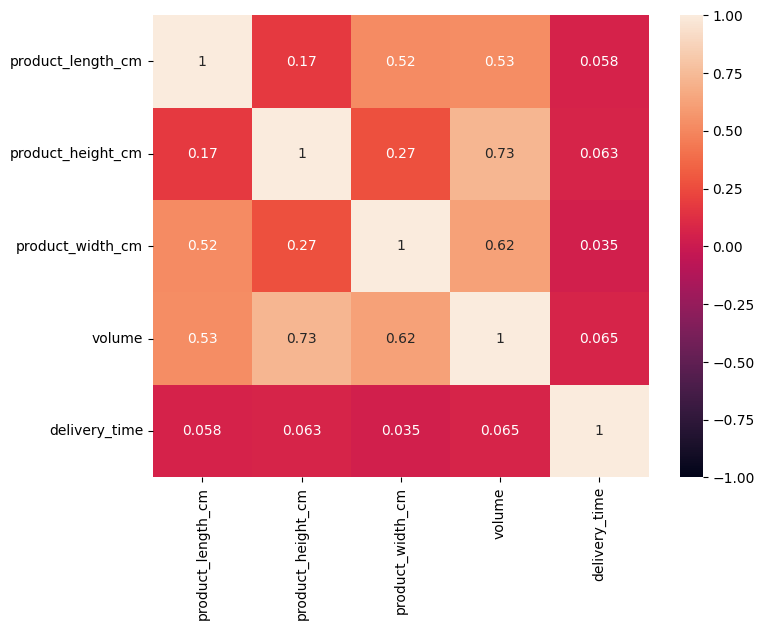

In [13]:
# Analisando melhor apenas a correlações com informações de dimensão do produto
# Criando df_dimensao como uma cópia para evitar SettingWithCopyWarning
df_dimensao = df[['product_length_cm', 'product_height_cm', 'product_width_cm']].copy()

# Calculando o volume usando .loc para evitar o aviso
df_dimensao.loc[:, 'volume'] = df_dimensao['product_length_cm'] * df_dimensao['product_height_cm'] * df_dimensao['product_width_cm']

# Usando .loc para atribuir a coluna 'delivery_time'
df_dimensao.loc[:, 'delivery_time'] = df['delivery_time']

plt.figure(figsize=(8,6))
sns.heatmap(df_dimensao.corr(), annot=True, vmin = -1, vmax = 1)
plt.show()

Percebemos que o frete não tem uma correlação muito grande com as informações de volume e peso. Mas essas informações apresentam certa correlação com o tempo de entrega, não muito grande.

### Tempo médio para cada nota possível na avaliação

In [14]:
# Calcular a média do tempo de entrega para cada avaliação
df['review_score'] = df['review_score'].astype(int)
media_tempo_review = df.groupby('review_score')['delivery_time'].mean().reset_index()

fig = px.bar(media_tempo_review, x='review_score', y='delivery_time',
             labels={'review_score': 'Nota', 'delivery_time': 'Tempo Médio de Entrega (dias)'},
             title='Tempo Médio de Entrega por Nota de Avaliação',
             text_auto=True,
             color='review_score', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    xaxis_title='Nota',
    yaxis_title='Tempo Médio de Entrega (dias)',
    title_x=0.5,
    template='plotly_white',
    height = 600
)

fig.update_traces(texttemplate='%{y:.2f} dias', textposition='outside')

fig.show()

Percebemos um comportamento inversamente proporcional. Quanto menor a avaliação, maior tende a ser o tempo de entrega, comprovando a hipótese.

### Análise de tempo médio de entrega para as categorias

In [15]:
# Primeira análise
media_tempo_categoria = df.groupby('product_category_name')['delivery_time'].mean().reset_index()
media_tempo_categoria.describe()

delivery_time
count      71.000000
mean       12.806198
std         1.506394
min         9.084893
25%        12.002621
50%        12.790471
75%        13.580003
max        19.214072

In [16]:
# Calcula o tempo médio de entrega por categoria de produto
media_tempo_categoria = df.groupby('product_category_name')['delivery_time'].mean().reset_index()

# Conta a quantidade de vezes que cada categoria aparece
contagem_categorias = df['product_category_name'].value_counts().reset_index()
contagem_categorias.columns = ['product_category_name', 'quantidade_pedidos']  

# Seleciona as top 10 categorias com mais pedidos
top_categorias = contagem_categorias.head(10)

# Soma a quantidade de pedidos das categorias que não estão no top 10
outras_categorias = contagem_categorias.iloc[10:].sum()
outras_categorias = pd.DataFrame({'product_category_name': ['Outros'],
                                  'quantidade_pedidos': [outras_categorias['quantidade_pedidos']]})

# Concatena as top 10 categorias com a categoria "Outros"
dados_final = pd.concat([top_categorias, outras_categorias])

# Calcula a porcentagem de cada categoria
dados_final['porcentagem'] = dados_final['quantidade_pedidos'] / dados_final['quantidade_pedidos'].sum() * 100

# Plota os dados usando plotly com gráfico de donut
fig = px.pie(dados_final, values='quantidade_pedidos', names='product_category_name',
             title='Distribuição de Pedidos por Categoria de Produto',
             hover_data=['porcentagem'],  
             width=800, height=600,
             color_discrete_sequence=px.colors.qualitative.Pastel, 
             hole=0.4) 

fig.show()

In [17]:
# Adiciona a coluna quantidade_pedidos ao DataFrame media_tempo_categoria
if 'quantidade_pedidos' not in media_tempo_categoria.columns:
    media_tempo_categoria = media_tempo_categoria.merge(contagem_categorias, on='product_category_name')

# Ordena o DataFrame pela quantidade_pedidos
media_tempo_categoria = media_tempo_categoria.sort_values(by='quantidade_pedidos', ascending=False)
media_tempo_categoria = media_tempo_categoria.head(10)
media_tempo_categoria = media_tempo_categoria.sort_values(by='quantidade_pedidos', ascending=True)

# Plota os dados usando plotly em um gráfico de barras
fig = px.bar(media_tempo_categoria, x='product_category_name', y='delivery_time',
             labels={'product_category_name': 'Categoria de Produto', 'delivery_time': 'Tempo Médio de Entrega (dias)'},
             title='Tempo Médio de Entrega por Categoria de Produto',
             text='delivery_time',  
             width=800, height=600,
             color='product_category_name',  
             color_discrete_sequence=px.colors.qualitative.Pastel)  

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='Categoria de Produto',
    yaxis_title='Tempo Médio de Entrega (dias)',
    title_x=0.5,
    template='plotly_white'
)

fig.show()

/home/jose/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
# Calcula o tempo médio de entrega por categoria de produto
media_tempo_categoria = df.groupby('product_category_name')['delivery_time'].mean().reset_index()

# Conta a quantidade de vezes que cada categoria aparece
contagem_categorias = df['product_category_name'].value_counts().reset_index()
contagem_categorias.columns = ['product_category_name', 'quantidade_pedidos']  

# Seleciona as 10 categorias com menos pedidos
menores_categorias = contagem_categorias.tail(10).sort_values('quantidade_pedidos', ascending = False)

# Plota os dados usando plotly com gráfico de donut
fig = px.bar(menores_categorias, x='quantidade_pedidos', y='product_category_name',
             orientation='h',
             title='Categorias com menores números de pedidos',  
             width=800, height=600,
             color='product_category_name',
             color_discrete_sequence=px.colors.qualitative.Pastel
             ) 
fig.update_layout(
    xaxis_title='Quantidade de pedidos',
    yaxis_title='Categoria de Produto',
    title_x=0.5,
    template='plotly_white'
)
fig.show()

/home/jose/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
# Calcula o tempo médio de entrega por categoria de produto
media_tempo_categoria = df.groupby('product_category_name')['delivery_time'].mean().reset_index()

# Adiciona a coluna quantidade_pedidos ao DataFrame media_tempo_categoria
if 'quantidade_pedidos' not in media_tempo_categoria.columns:
    media_tempo_categoria = media_tempo_categoria.merge(contagem_categorias, on='product_category_name')

# Ordena o DataFrame pela quantidade_pedidos
media_tempo_categoria = media_tempo_categoria.sort_values(by='quantidade_pedidos', ascending=False)
media_tempo_categoria = media_tempo_categoria.tail(10)
media_tempo_categoria = media_tempo_categoria.sort_values(by='quantidade_pedidos', ascending=True)

# Plota os dados usando plotly em um gráfico de barras
fig = px.bar(media_tempo_categoria, x='product_category_name', y='delivery_time',
             labels={'product_category_name': 'Categoria de Produto', 'delivery_time': 'Tempo Médio de Entrega (dias)'},
             title='Tempo Médio de Entrega por Categoria de Produto',
             text='delivery_time',  
             width=800, height=600,
             color='product_category_name',  
             color_discrete_sequence=px.colors.qualitative.Pastel)  

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='Categoria de Produto',
    yaxis_title='Tempo Médio de Entrega (dias)',
    title_x=0.5,
    template='plotly_white'
)

fig.show()

/home/jose/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
# Relação dos top 10 inferiores e superiores de Categoria do produto x frete MÉDIO
dfFrete = df[['freight_value', 'product_category_name']].groupby(['product_category_name']).mean()

# Selecionando as 10 categorias com maiores valores de frete médio
top_10_freight = dfFrete.nlargest(10, 'freight_value')

# Selecionando as 10 categorias com menores valores de frete médio
bottom_10_freight = dfFrete.nsmallest(10, 'freight_value')

# Gráfico das 10 categorias com maiores valores de frete médio
fig_top = go.Figure(go.Bar(
    x=top_10_freight['freight_value'],
    y=top_10_freight.index,
    orientation='h',
    marker=dict(color='skyblue')
))
fig_top.update_layout(
    title='Top 10 Categorias com Maiores Valores de Frete Médio',
    xaxis_title='Frete Médio',
    yaxis_title='Categoria de Produto'
)

# Gráfico das 10 categorias com menores valores de frete médio
fig_bottom = go.Figure(go.Bar(
    x=bottom_10_freight['freight_value'],
    y=bottom_10_freight.index,
    orientation='h',
    marker=dict(color='lightcoral')
))
fig_bottom.update_layout(
    title='Top 10 Categorias com Menores Valores de Frete Médio',
    xaxis_title='Frete Médio',
    yaxis_title='Categoria de Produto'
)

fig_top.show()
fig_bottom.show()

In [21]:
# Gráfico de relação entre categorias e tempo real e estimado

# Supondo que df já está carregado
dfTempo = df[['delivery_time', 'delivery_time_model', 'product_category_name']].groupby(['product_category_name']).mean()

# Selecionar as 10 categorias com menores médias de tempo de entrega real e estimado
top10_categories_min = dfTempo.nsmallest(10, ['delivery_time', 'delivery_time_model']).index

# Selecionar as 10 categorias com maiores médias de tempo de entrega real e estimado
top10_categories_max = dfTempo.nlargest(10, ['delivery_time', 'delivery_time_model']).index

# Filtrar o DataFrame original para conter apenas essas categorias
dfTempo_min = dfTempo.loc[top10_categories_min].reset_index()
dfTempo_max = dfTempo.loc[top10_categories_max].reset_index()

# Reformatar os DataFrames para o formato longo necessário para o Plotly
dfTempo_long_min = pd.melt(dfTempo_min, id_vars=['product_category_name'], 
                           value_vars=['delivery_time', 'delivery_time_model'],
                           var_name='Tipo de Tempo', value_name='Tempo Médio')

dfTempo_long_max = pd.melt(dfTempo_max, id_vars=['product_category_name'], 
                           value_vars=['delivery_time', 'delivery_time_model'],
                           var_name='Tipo de Tempo', value_name='Tempo Médio')

# Mapear os valores da variável "Tipo de Tempo" para os novos rótulos
dfTempo_long_min['Tipo de Tempo'] = dfTempo_long_min['Tipo de Tempo'].map({
    'delivery_time': 'Tempo de entrega real',
    'delivery_time_model': 'Tempo de entrega estimado'
})

dfTempo_long_max['Tipo de Tempo'] = dfTempo_long_max['Tipo de Tempo'].map({
    'delivery_time': 'Tempo de entrega real',
    'delivery_time_model': 'Tempo de entrega estimado'
})

# Criar os gráficos
fig_min = px.histogram(dfTempo_long_min, x="product_category_name", y="Tempo Médio",
                       color="Tipo de Tempo", barmode='group', height=400,
                       labels={'product_category_name': 'Categoria de Produto', 'Tempo Médio': 'Tempo Médio (Unidade de Medida)'},
                       title='10 Categorias com Menores Médias de Tempo de Entrega')

fig_max = px.histogram(dfTempo_long_max, x="product_category_name", y="Tempo Médio",
                       color="Tipo de Tempo", barmode='group', height=400,
                       labels={'product_category_name': 'Categoria de Produto', 'Tempo Médio': 'Tempo Médio (Unidade de Medida)'},
                       title='10 Categorias com Maiores Médias de Tempo de Entrega')

# Mostrar os gráficos
fig_min.update_yaxes(title_text='Tempo Médio (Unidade de Medida)')
fig_max.update_yaxes(title_text='Tempo Médio (Unidade de Medida)')

fig_min.show()
fig_max.show()

/home/jose/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/jose/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Percebemos que não há uma relação muito forte entre a quantidade de vendas de uma categoria e o tempo médio de entrega. Apesar da quantidade cair drasticamente, o tempo médio reduz bem pouco. A maioria deles tendem a estar entre 12 e 14 dias, independente do volume vendido.

### Análise de tempo de entrega e frete por cidades e estados

In [22]:
# Contagem de pedidos por cidade do comprador
orders_by_customer_city = df['customer_city'].value_counts().reset_index().head(10)
orders_by_customer_city.columns = ['customer_city', 'total_orders_customer']

# Contagem de pedidos por cidade do vendedor
orders_by_seller_city = df['seller_city'].value_counts().reset_index().head(10)
orders_by_seller_city.columns = ['seller_city', 'total_orders_seller']

# Gráfico de pedidos por cidade do comprador
fig1 = px.bar(orders_by_customer_city, x='customer_city', y='total_orders_customer',
              title='Pedidos Totais por Cidade do Comprador')

# Gráfico de pedidos por cidade do vendedor
fig2 = px.bar(orders_by_seller_city, x='seller_city', y='total_orders_seller',
              title='Pedidos Totais por Cidade do Vendedor')

# Exibindo os gráficos
fig1.show()
fig2.show()

In [23]:
# Contagem de pedidos por Estado do comprador
orders_by_customer_state = df['customer_state'].value_counts().reset_index().head(10)
orders_by_customer_state.columns = ['customer_state', 'total_orders_customer']

# Contagem de pedidos por Estado do vendedor
orders_by_seller_city = df['seller_state'].value_counts().reset_index().head(10)
orders_by_seller_city.columns = ['seller_state', 'total_orders_seller']

# Gráfico de pedidos por Estado do comprador
fig1 = px.bar(orders_by_customer_state, x='customer_state', y='total_orders_customer',
              title='Pedidos Totais por Estado do Comprador')

# Gráfico de pedidos por Estado do vendedor
fig2 = px.bar(orders_by_seller_city, x='seller_state', y='total_orders_seller',
              title='Pedidos Totais por Estado do Vendedor')

# Exibindo os gráficos
fig1.show()
fig2.show()

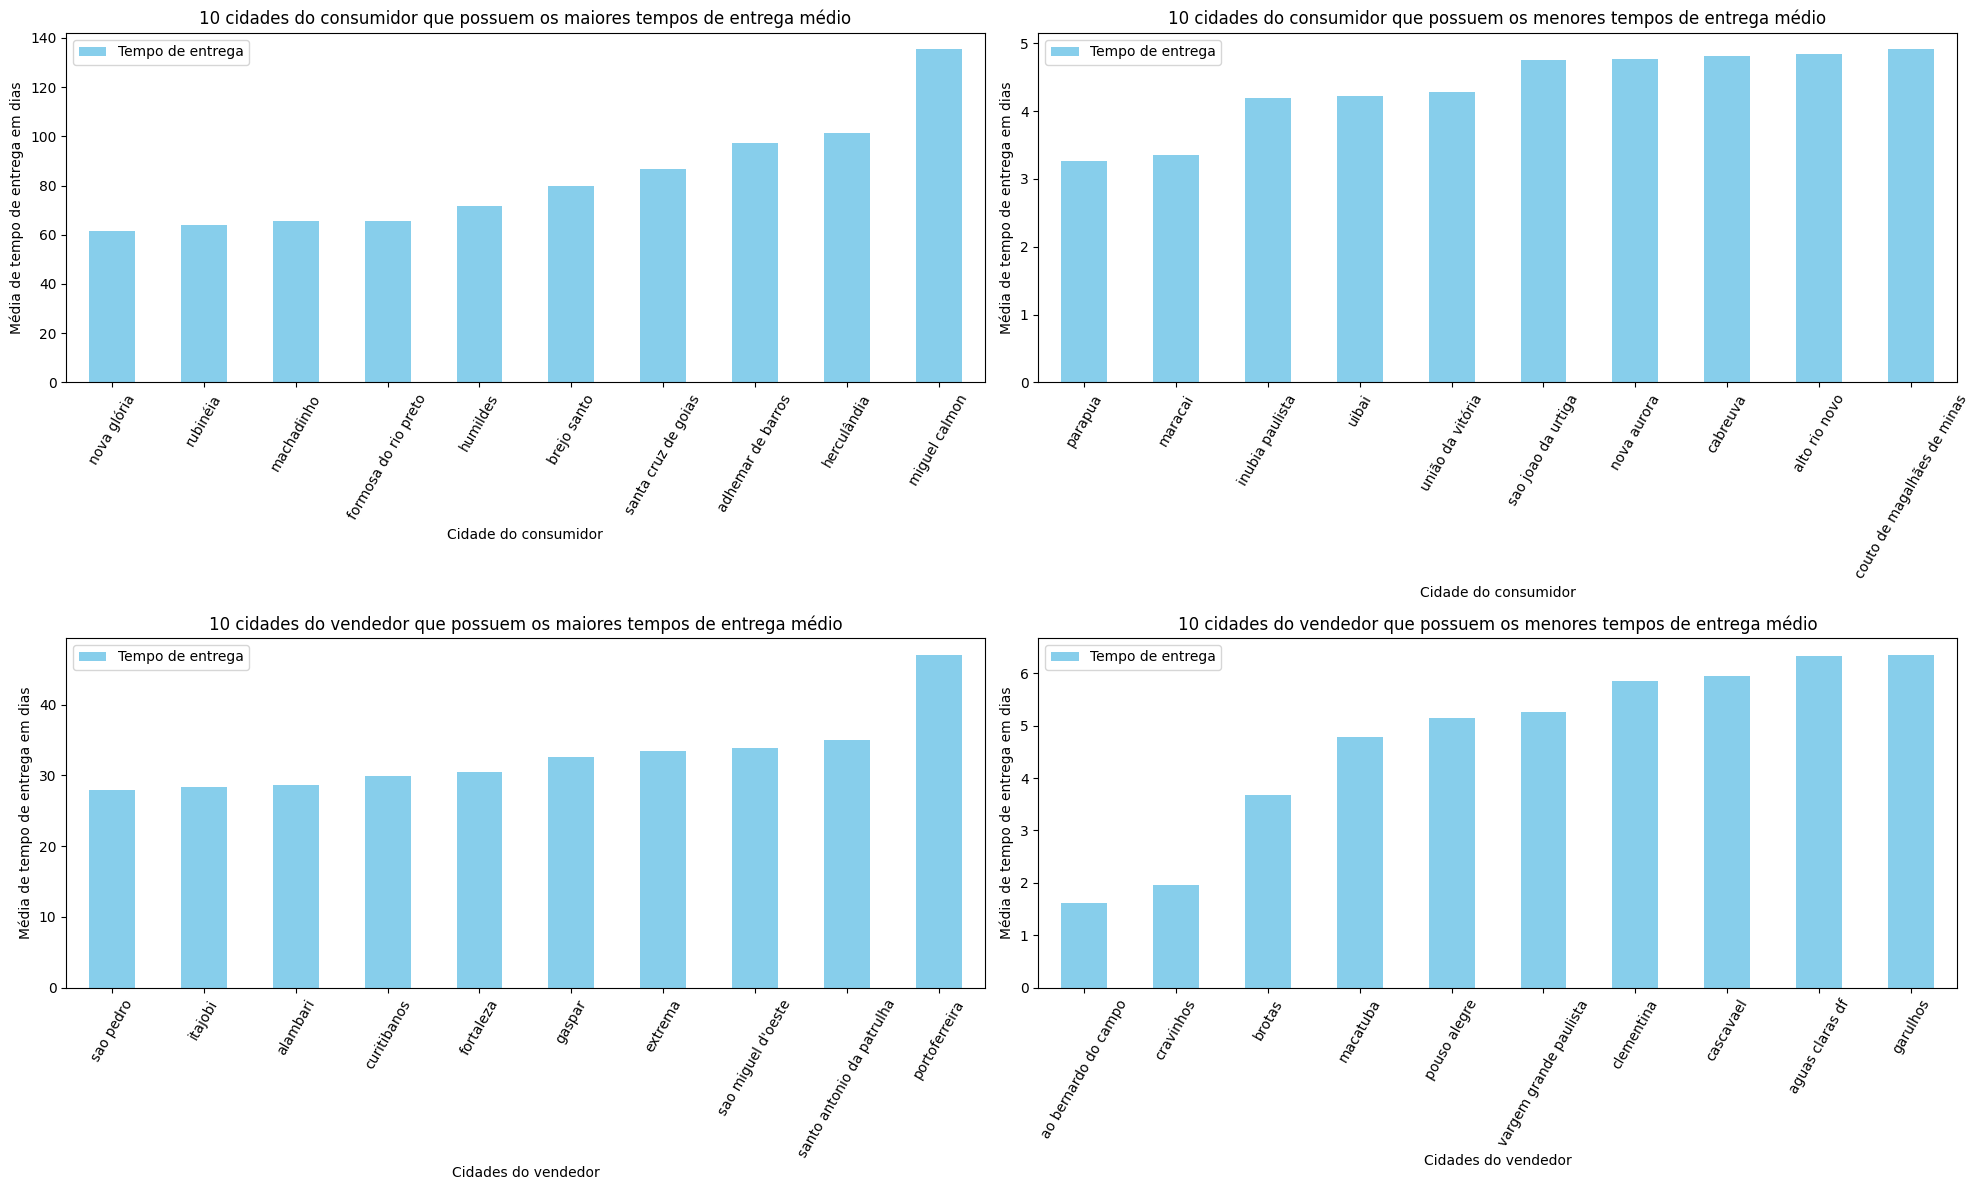

In [24]:
# Função para criar os gráficos
def create_bar_chart(ax, df, title, x_label, y_label, legend_label):
    df.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(df.index, rotation=60)
    ax.legend([legend_label])

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Gráfico 1: 10 últimas cidades do comprador
dfCidComprador = df[['customer_city', 'delivery_time']].groupby(['customer_city']).mean()
dfCidCompradorFINAL = dfCidComprador[dfCidComprador['delivery_time'].isin(sorted(dfCidComprador['delivery_time'])[-10:])]
dfCidCompradorFINAL = dfCidCompradorFINAL.sort_values('delivery_time')
create_bar_chart(axes[0, 0], dfCidCompradorFINAL, '10 cidades do consumidor que possuem os maiores tempos de entrega médio', 'Cidade do consumidor', 'Média de tempo de entrega em dias', 'Tempo de entrega')

# Gráfico 2: 10 primeiras cidades do comprador
dfCidCompradorFINAL = dfCidComprador[dfCidComprador['delivery_time'].isin(sorted(dfCidComprador['delivery_time'])[:10])]
dfCidCompradorFINAL = dfCidCompradorFINAL.sort_values('delivery_time')
create_bar_chart(axes[0, 1], dfCidCompradorFINAL, '10 cidades do consumidor que possuem os menores tempos de entrega médio', 'Cidade do consumidor', 'Média de tempo de entrega em dias', 'Tempo de entrega')

# Gráfico 3: 10 últimos estados do vendedor
dfCidComprador = df[['seller_city', 'delivery_time']].groupby(['seller_city']).mean()
dfCidCompradorFINAL = dfCidComprador[dfCidComprador['delivery_time'].isin(sorted(dfCidComprador['delivery_time'])[-10:])]
dfCidCompradorFINAL = dfCidCompradorFINAL.sort_values('delivery_time')
create_bar_chart(axes[1, 0], dfCidCompradorFINAL, '10 cidades do vendedor que possuem os maiores tempos de entrega médio', 'Cidades do vendedor', 'Média de tempo de entrega em dias', 'Tempo de entrega')

# Gráfico 4: 10 primeiros estados do vendedor
dfCidCompradorFINAL = dfCidComprador[dfCidComprador['delivery_time'].isin(sorted(dfCidComprador['delivery_time'])[:10])]
dfCidCompradorFINAL = dfCidCompradorFINAL.sort_values('delivery_time')
create_bar_chart(axes[1, 1], dfCidCompradorFINAL, '10 cidades do vendedor que possuem os menores tempos de entrega médio', 'Cidades do vendedor', 'Média de tempo de entrega em dias', 'Tempo de entrega')

fig.tight_layout()
plt.show()


In [30]:
# Observação sobres latitude
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt

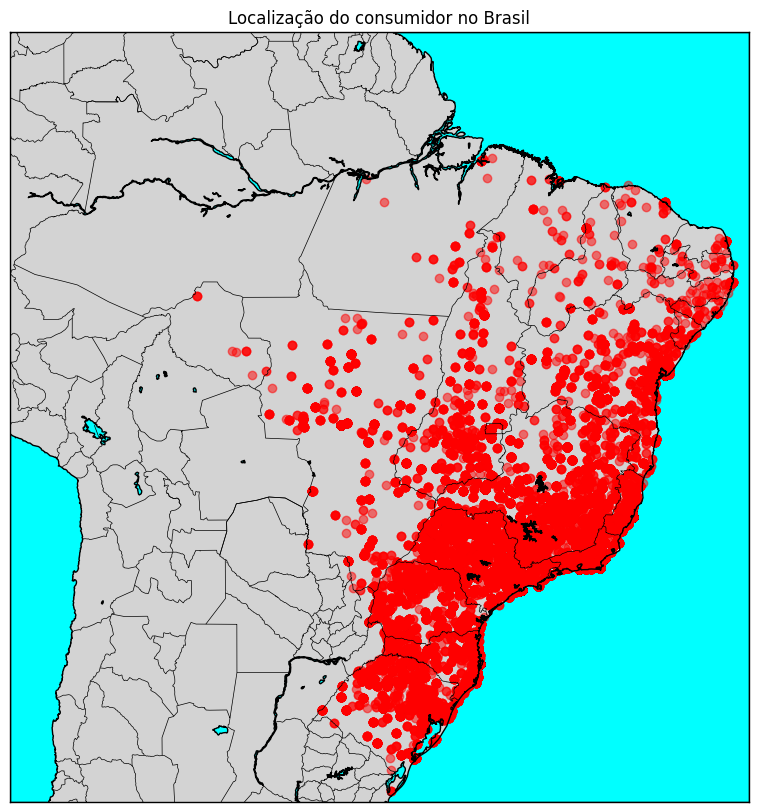

In [31]:
# Carregar o arquivo Excel
file_path = './baseDeDados/dataBaseTratada.xlsx'
workbook = load_workbook(file_path, read_only=True)
sheet = workbook.active

# Obter o índice das colunas 'Latitude_Comprador' e 'Longitude_Comprador'
headers = next(sheet.iter_rows(min_row=1, max_row=1, values_only=True))
latitude_customer_index = headers.index('Latitude_Comprador')
longitude_customer_index = headers.index('Longitude_Comprador')

# Extrair os dados das colunas 'Latitude_Comprador' e 'Longitude_Comprador'
latitude_data = []
longitude_data = []

for row in sheet.iter_rows(min_row=2, values_only=True):
    latitude_data.append(row[latitude_customer_index])
    longitude_data.append(row[longitude_customer_index])

# Converter as listas em um DataFrame
location_df = pd.DataFrame({'Latitude': latitude_data, 'Longitude': longitude_data})

# Criar o scatter plot para latitude e longitude dos clientes com o mapa do Brasil ao fundo
plt.figure(figsize=(10, 10))

# Configurar o mapa
m = Basemap(projection='merc', llcrnrlat=-34.0, urcrnrlat=5.5,
            llcrnrlon=-74.0, urcrnrlon=-34.0, resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Converter coordenadas para o sistema de coordenadas do mapa
x, y = m(location_df['Longitude'].values, location_df['Latitude'].values)

# Plotar os pontos no mapa
m.scatter(x, y, alpha=0.5, c='red', marker='o')

plt.title('Localização do consumidor no Brasil')
plt.show()


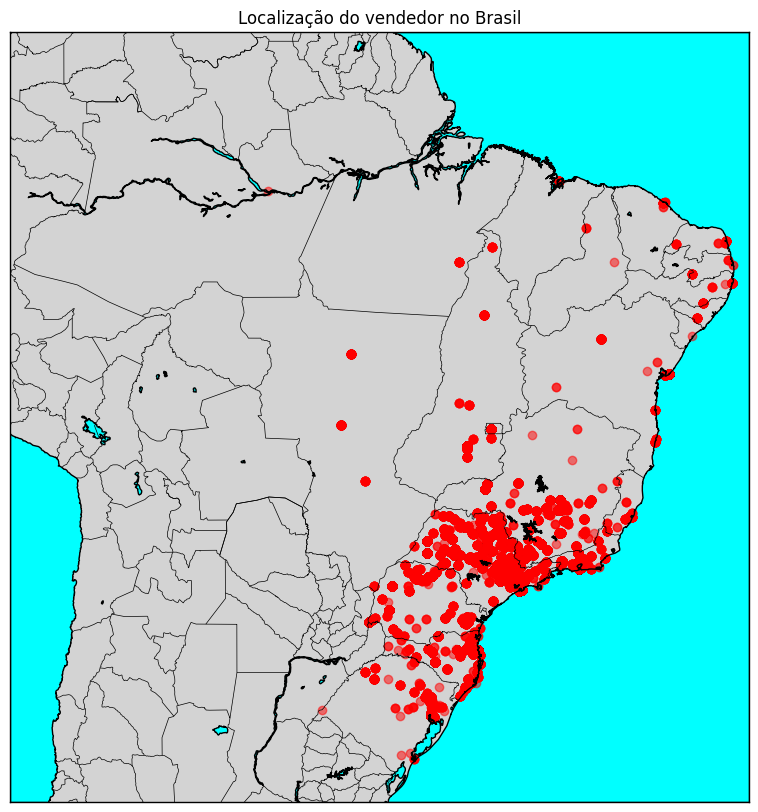

In [32]:
# Carregar o arquivo Excel
file_path = './baseDeDados/dataBaseTratada.xlsx'
workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active

# Obter o índice das colunas 'Latitude_Comprador' e 'Longitude_Comprador'
headers = next(sheet.iter_rows(min_row=1, max_row=1, values_only=True))
latitude_customer_index = headers.index('Latitude_Vendedor')
longitude_customer_index = headers.index('Longitude_Vendedor')

# Extrair os dados das colunas 'Latitude_Comprador' e 'Longitude_Comprador'
latitude_data = []
longitude_data = []

for row in sheet.iter_rows(min_row=2, values_only=True):
    latitude_data.append(row[latitude_customer_index])
    longitude_data.append(row[longitude_customer_index])

# Converter as listas em um DataFrame
location_df = pd.DataFrame({'Latitude': latitude_data, 'Longitude': longitude_data})

# Criar o scatter plot para latitude e longitude dos clientes com o mapa do Brasil ao fundo
plt.figure(figsize=(10, 10))

# Configurar o mapa
m = Basemap(projection='merc', llcrnrlat=-34.0, urcrnrlat=5.5,
            llcrnrlon=-74.0, urcrnrlon=-34.0, resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')

# Converter coordenadas para o sistema de coordenadas do mapa
x, y = m(location_df['Longitude'].values, location_df['Latitude'].values)

# Plotar os pontos no mapa
m.scatter(x, y, alpha=0.5, c='red', marker='o')

plt.title('Localização do vendedor no Brasil')
plt.show()

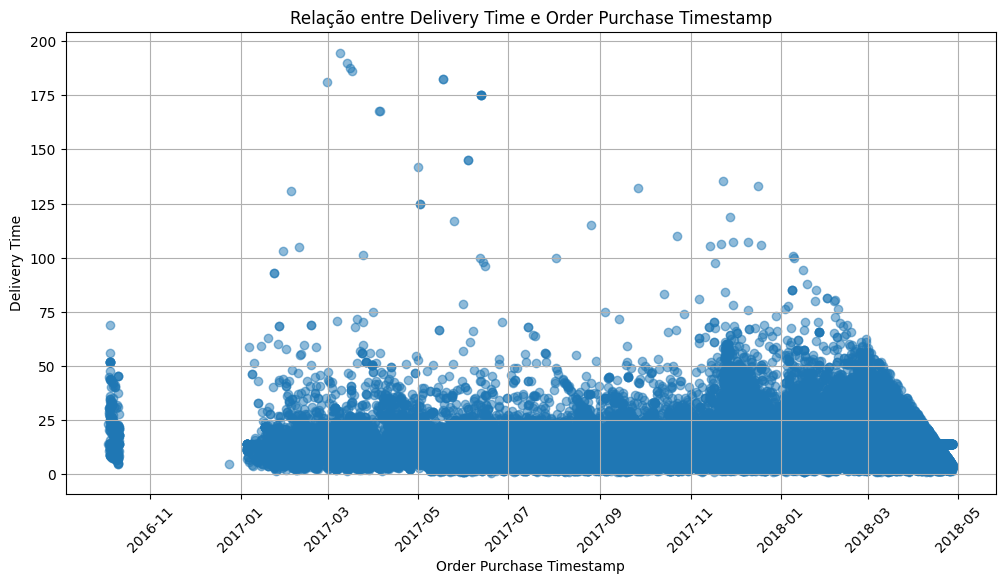

In [ ]:

# Plotar a relação entre delivery_time e order_purchase_timestamp
plt.figure(figsize=(12, 6))
plt.scatter(df['order_purchase_timestamp'], df['delivery_time'], alpha=0.5)
plt.title('Relação entre Delivery Time e Order Purchase Timestamp')
plt.xlabel('Order Purchase Timestamp')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


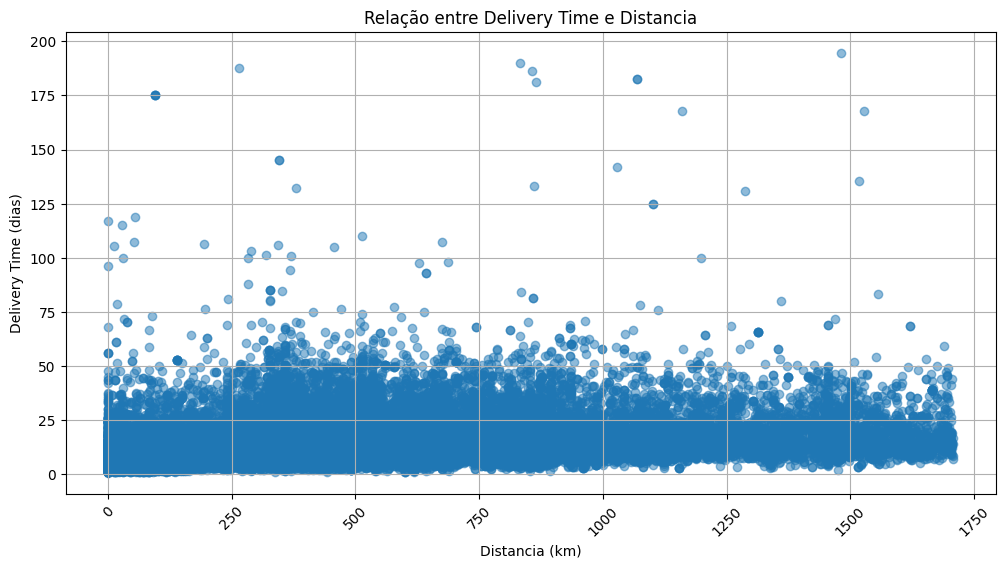

In [ ]:
# Plotar a relação entre delivery_time e order_purchase_timestamp
plt.figure(figsize=(12, 6))
plt.scatter(df['Distancia'], df['delivery_time'], alpha=0.5)
plt.title('Relação entre Delivery Time e Distancia')
plt.xlabel('Distancia (km)')
plt.ylabel('Delivery Time (dias)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()